In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Activity 06: Census

The US completes a census every 10 years to take a count of all people living in the country. Then, each year the US Census Bureau creates an updated estimate of that population until the next census is completed. We are still waiting for the US Census Bureau to release data in a .csv format that's suitable for use in a Jupyter Notebook.

In the meantime, load the data from the US Census Bureau from the 2019 update ([source](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/?C=S;O=A))

In [2]:
full = Table.read_table('data/nc-est2019-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


You'll notice that there are many variables for each row of this data set. We'll describe them below:

|VARIABLE|DESCRIPTION|
|--------|-----------|
|SEX|Sex|
|AGE|Age|
|CENSUS2010POP|4/1/2010 resident Census 2010 population|
|ESTIMATESBASE2010|4/1/2010 resident population estimates base|
|POPESTIMATE2010|7/1/2010 resident population estimate|
|POPESTIMATE2011|7/1/2011 resident population estimate|
|POPESTIMATE2012|7/1/2012 resident population estimate|
|POPESTIMATE2013|7/1/2013 resident population estimate|
|POPESTIMATE2014|7/1/2014 resident population estimate|
|POPESTIMATE2015|7/1/2015 resident population estimate|
|POPESTIMATE2016|7/1/2016 resident population estimate|
|POPESTIMATE2017|7/1/2017 resident population estimate|
|POPESTIMATE2018|7/1/2018 resident population estimate|
|POPESTIMATE2019|7/1/2019 resident population estimate|

## `SEX`
The key for SEX is as follows:

>0 = Total
>
>1 = Male
>
>2 = Female

## `AGE`
AGE is single-year of age (0, 1, 2, . . ., 99, 100+ years) and 999 is used to indicate total population

## Exploring the Data

Now, let's focus on the popultionas from the official census in 2010 and the most recent estimates available from 2019. Select only the columns `SEX`, `AGE`, `CENSUS2010POP`, and `POPESTIMATE2019`.

In [3]:
# Select the columns needed from `full`
partial = full.select('SEX', 'AGE', 'CENSUS2010POP', 'POPESTIMATE2019')
partial

SEX,AGE,CENSUS2010POP,POPESTIMATE2019
0,0,3944153,3783052
0,1,3978070,3829599
0,2,4096929,3922044
0,3,4119040,3998665
0,4,4063170,4043323
0,5,4056858,4028281
0,6,4066381,4017227
0,7,4030579,4022319
0,8,4046486,4066194
0,9,4148353,4061874


In [4]:
# Rename the columns to make them easier to refer to
simple = partial.relabeled('CENSUS2010POP', '2010').relabeled('POPESTIMATE2019', '2019')
simple

SEX,AGE,2010,2019
0,0,3944153,3783052
0,1,3978070,3829599
0,2,4096929,3922044
0,3,4119040,3998665
0,4,4063170,4043323
0,5,4056858,4028281
0,6,4066381,4017227
0,7,4030579,4022319
0,8,4046486,4066194
0,9,4148353,4061874


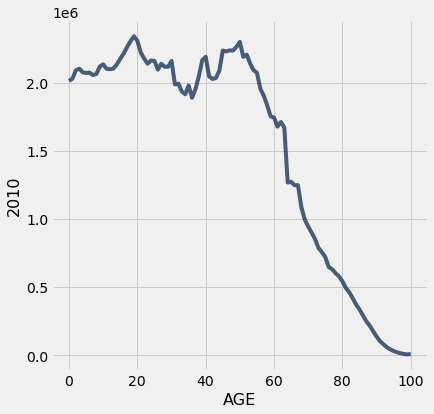

In [5]:
# Look at some line graphs and discuss the patterns
to_graph = simple.where('SEX', 1).where('AGE', are.below(999)).drop('SEX')
to_graph.plot('AGE', '2010')

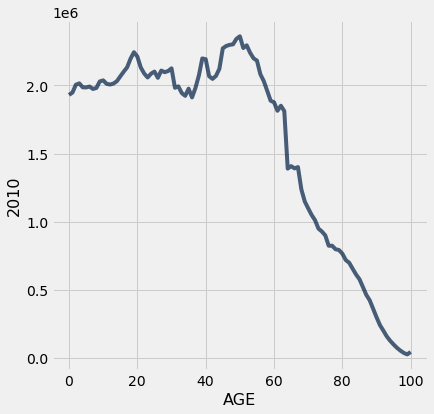

In [6]:
# Look at some line graphs and discuss the patterns
to_graph = simple.where('SEX', 2).where('AGE', are.below(999)).drop('SEX')
to_graph.plot('AGE', '2010')

## Percent Change

Create a new table named `changes` that has the following columns: `AGE`, `POPCHANGE`, and `PERCENTCHANGE`, where each row corresponds to a row in the `partial` table where `SEX` was 0, and `AGE` was for a single-year (not 999). 

The `POPCHANGE` column should represent the popualation growth from the 2010 census to the 2019 estimate, measured in people.

The `PERCENTCHANGE` column should represent the percent change between from the 2010 census to the 2019 estimate. Use array operations to calculate these columns and table methods to create the table that contains them.

In [7]:
# Create a table with the reduced set of rows and columns
initial = simple.where('SEX', 0).where('AGE', are.below(999)).drop('SEX')
initial

AGE,2010,2019
0,3944153,3783052
1,3978070,3829599
2,4096929,3922044
3,4119040,3998665
4,4063170,4043323
5,4056858,4028281
6,4066381,4017227
7,4030579,4022319
8,4046486,4066194
9,4148353,4061874


In [8]:
# Create an ARRAY that contains the values for the `POPCHANGE` column
population_change = initial.column(2)-initial.column(1)
population_change

array([-161101, -148471, -174885, -120375,  -19847,  -28577,  -49154,
         -8260,   19708,  -86479, -111601,   74846,  102144,   57208,
         -1523,  -67361, -165719, -252870, -245028, -254795, -249446,
        -75971,   34130,  143073,  195155,  276708,  458915,  485000,
        603476,  583068,  328716,  532093,  434658,  552823,  620916,
        359432,  570357,  426841,  183696,   17553, -277961,  -94731,
       -101363, -251065, -244221, -670959, -630389, -477227, -256139,
       -276126, -563723, -460288, -499064, -311503,   13604,  119856,
        323503,  405999,  590642,  772586,  631532,  722576,  593463,
        512204, 1293447, 1093836,  978928,  815072, 1021803, 1110099,
       1093583, 1133760, 1326773,  597473,  598677,  578209,  751322,
        455931,  320694,  228714,  166767,  168776,   79920,   76381,
         82036,    7744,   42435,   66015,   62459,   97984,  100884,
        122185,  112678,  103807,   94828,   77369,   62240,   48831,
         40250,   24

In [9]:
# Create an ARRAY that contains the values for the `PERCENTCHANGE` column
percent_change = population_change / initial.column(1)
percent_change

array([-4.08455250e-02, -3.73223699e-02, -4.26868515e-02, -2.92240425e-02,
       -4.88460980e-03, -7.04412134e-03, -1.20878983e-02, -2.04933336e-03,
        4.87039866e-03, -2.08465866e-02, -2.67465317e-02,  1.81911645e-02,
        2.48752935e-02,  1.38921368e-02, -3.65580072e-04, -1.58764690e-02,
       -3.83951953e-02, -5.75319745e-02, -5.44403230e-02, -5.55685926e-02,
       -5.51978047e-02, -1.74473749e-02,  8.00301643e-03,  3.40765942e-02,
        4.59257070e-02,  6.49191174e-02,  1.10520542e-01,  1.14148024e-01,
        1.43164971e-01,  1.38067134e-01,  7.67012284e-02,  1.34021104e-01,
        1.09022995e-01,  1.42474647e-01,  1.61729895e-01,  9.08474652e-02,
        1.50011559e-01,  1.08488237e-01,  4.45660718e-02,  4.02149379e-03,
       -6.34140143e-02, -2.30209831e-02, -2.48676187e-02, -6.11592152e-02,
       -5.79891326e-02, -1.48808748e-01, -1.39473968e-01, -1.05225825e-01,
       -5.64332479e-02, -5.99504853e-02, -1.20962943e-01, -1.03096538e-01,
       -1.10882265e-01, -

In [10]:
# Create the final table named `changes` has has columns `AGE`, `2010`, `2019`, `POPCHANGE`, and `PERCENTCHANGE`
changes = initial.with_columns('POPCHANGE', population_change, 'PERCENTCHANGE', percent_change)

# These lines will format the data to make it look nicer
changes.set_format('PERCENTCHANGE', PercentFormatter)
changes.set_format(make_array('2010', '2019', 'POPCHANGE'), NumberFormatter)

# This line will show the first 25 rows in the table
changes.show(25)

AGE,2010,2019,POPCHANGE,PERCENTCHANGE
0,"3,944,153","3,783,052","-161,101",-4.08%
1,"3,978,070","3,829,599","-148,471",-3.73%
2,"4,096,929","3,922,044","-174,885",-4.27%
3,"4,119,040","3,998,665","-120,375",-2.92%
4,"4,063,170","4,043,323","-19,847",-0.49%
5,"4,056,858","4,028,281","-28,577",-0.70%
6,"4,066,381","4,017,227","-49,154",-1.21%
7,"4,030,579","4,022,319","-8,260",-0.20%
8,"4,046,486","4,066,194","19,708",0.49%
9,"4,148,353","4,061,874","-86,479",-2.08%


## Explore Census Data

The US Census Bureau held a competition around the 2020 Census called "Let's Make it Count" [link](https://www.letsmakeitcount.org/). It's described as follows:

> ### ASK QUESTIONS. EXPLORE DATA. SHARE INSIGHTS.
> Learn more about Census data at https://census.gov/academy and submit a story here about how Census information and context matters to you and/or your community. 

> Submissions can include, but are not limited to: posters, infographics, essays, captioned photos, interactive or static data visualization(s), apps, and websites.

> Entries will be reviewed by the competition hosts and community leaders for creativity, clarity of message, and the use of Census data for effective storytelling. Submissions should address how the participant has been, is, or will be Asking Questions, Exploring Data, and Sharing Insights.

While we haven't learned a lot about data visualization yet in this course, you should be able to dig into this census data and look for patterns and trends. Create some code cells below and investigate the data. If you find anything of interest, share it to the course discussion board under Activity 06.